In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Understand the Data
1. Load the Data
2. Inspect Data Types and Missing Values
3. Drop any Empty Rows

In [2]:
# Load the dataset
data = pd.read_csv('data_0.csv', encoding='latin1')

In [3]:
# Display the first few rows of the dataset
data.head()

,Bedrooms,Bathrooms,SquareFootageHouse,Location,Age,PoolQuality,HasPhotovoltaics,HeatingType,HasFiberglass,IsFurnished,...,HasFireplace,KitchensQuality,BathroomsQuality,BedroomsQuality,LivingRoomsQuality,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,WindowModelNames,Price
0,NaN,1.0,67.0,Rural,4.0,Poor,False,Gas,True,True,...,False,Excellent,Poor,Good,Good,10.0,2.64,NaN,Steel Q69 Window,333.30685
1,NaN,5.0,138.0,Urban,71.0,NaN,NaN,Oil,False,True,...,False,Good,Poor,Excellent,Good,7.0,3.14,219.2,BUW Aluminum M542LK Window,255.40604
2,1.0,NaN,87.0,NaN,63.0,NaN,True,Oil,True,False,...,False,Good,Good,Good,Good,7.0,2.64,139.2,VIWF Wood FRTJ,106.78187
3,3.0,1.0,125.0,Suburbann,50.0,Poor,False,Gas,False,False,...,False,Good,Good,Excellent,Good,10.0,3.06,123.0,O226N Wood O16VY Window,120.14759
4,NaN,1.0,27.0,Suburban,29.0,Good,True,Electric,False,False,...,False,Good,Excellent,Excellent,Good,16.0,2.73,NaN,Wood 1R6OXF Window,76.89980


In [4]:
# Display summary statistics
data.describe()

,Bedrooms,Bathrooms,SquareFootageHouse,Age,SquareFootageGarden,PreviousOwnerRating,HeatingCosts,Price
count,652.000000,690.000000,995.000000,862.000000,995.000000,995.000000,451.000000,995.000000
mean,1.774540,1.692754,139.807035,44.848028,10.990955,2.542724,225.146785,281.871820
std,1.050095,1.005690,660.771646,17.797842,6.023839,0.852314,965.791990,634.244094
min,1.000000,1.000000,-937.000000,-98.000000,7.000000,1.000000,-498.000000,35.354600
25%,1.000000,1.000000,52.000000,34.000000,7.000000,1.855000,51.300000,124.655810
50%,1.000000,1.000000,89.000000,47.000000,7.000000,2.470000,79.800000,185.931750
75%,2.000000,2.000000,121.000000,58.000000,16.000000,3.090000,131.500000,278.941570
max,5.000000,5.000000,8916.000000,71.000000,26.000000,4.990000,8643.000000,10449.976800


In [5]:
# Drop the full empty rows
data.dropna(how='all', inplace=True)

In [6]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bedrooms             652 non-null    float64
 1   Bathrooms            690 non-null    float64
 2   SquareFootageHouse   995 non-null    float64
 3   Location             910 non-null    object 
 4   Age                  862 non-null    float64
 5   PoolQuality          352 non-null    object 
 6   HasPhotovoltaics     726 non-null    object 
 7   HeatingType          995 non-null    object 
 8   HasFiberglass        995 non-null    object 
 9   IsFurnished          995 non-null    object 
 10  DateSinceForSale     995 non-null    object 
 11  HouseColor           915 non-null    object 
 12  PreviousOwnerName    936 non-null    object 
 13  HasFireplace         995 non-null    object 
 14  KitchensQuality      995 non-null    object 
 15  BathroomsQuality     995 non-null    object 


In [7]:
# Check for missing values
data.isnull().sum()

Bedrooms               343
Bathrooms              305
SquareFootageHouse       0
Location                85
Age                    133
PoolQuality            643
HasPhotovoltaics       269
HeatingType              0
HasFiberglass            0
IsFurnished              0
DateSinceForSale         0
HouseColor              80
PreviousOwnerName       59
HasFireplace             0
KitchensQuality          0
BathroomsQuality         0
BedroomsQuality          0
LivingRoomsQuality       0
SquareFootageGarden      0
PreviousOwnerRating      0
HeatingCosts           544
WindowModelNames         0
Price                    0
dtype: int64

In [8]:
# Print unique and count values for some column

columns = ['PoolQuality','Location','HeatingType','HasFiberglass','HasFireplace',
           'KitchensQuality','BathroomsQuality','BedroomsQuality','LivingRoomsQuality']

for column in columns:
    
    # Check if the column is numeric
    if not np.issubdtype(data[column].dtype, np.number):
        unique_values = data[column].unique()
        print(f"Column: {column}")
        
        # Print unique values and their counts
        for value in unique_values:
            count = data[data[column] == value].shape[0]
            print(f"Value: {value}, Count: {count}")
        
        print()


Column: PoolQuality
Value: Poor, Count: 91
Value: nan, Count: 0
Value: Good, Count: 184
Value: Excellent, Count: 77

Column: Location
Value: Rural, Count: 299
Value: Urban, Count: 325
Value: nan, Count: 0
Value: Suburbann, Count: 141
Value: Suburban, Count: 145

Column: HeatingType
Value: Gas, Count: 278
Value: Oil, Count: 185
Value: Electric, Count: 172
Value: Electricity, Count: 175
Value: Oil Heating, Count: 185

Column: HasFiberglass
Value: True, Count: 372
Value: False, Count: 623

Column: HasFireplace
Value: False, Count: 993
Value: True, Count: 2

Column: KitchensQuality
Value: Excellent, Count: 281
Value: Good, Count: 520
Value: Poor, Count: 194

Column: BathroomsQuality
Value: Poor, Count: 200
Value: Good, Count: 488
Value: Excellent, Count: 307

Column: BedroomsQuality
Value: Good, Count: 464
Value: Excellent, Count: 327
Value: Poor, Count: 204

Column: LivingRoomsQuality
Value: Good, Count: 492
Value: Poor, Count: 204
Value: Excellent, Count: 299



# Step 2: Exploratory Data Analysis (EDA)
1. Visualize the distribution
2. Explore the relationships between the features

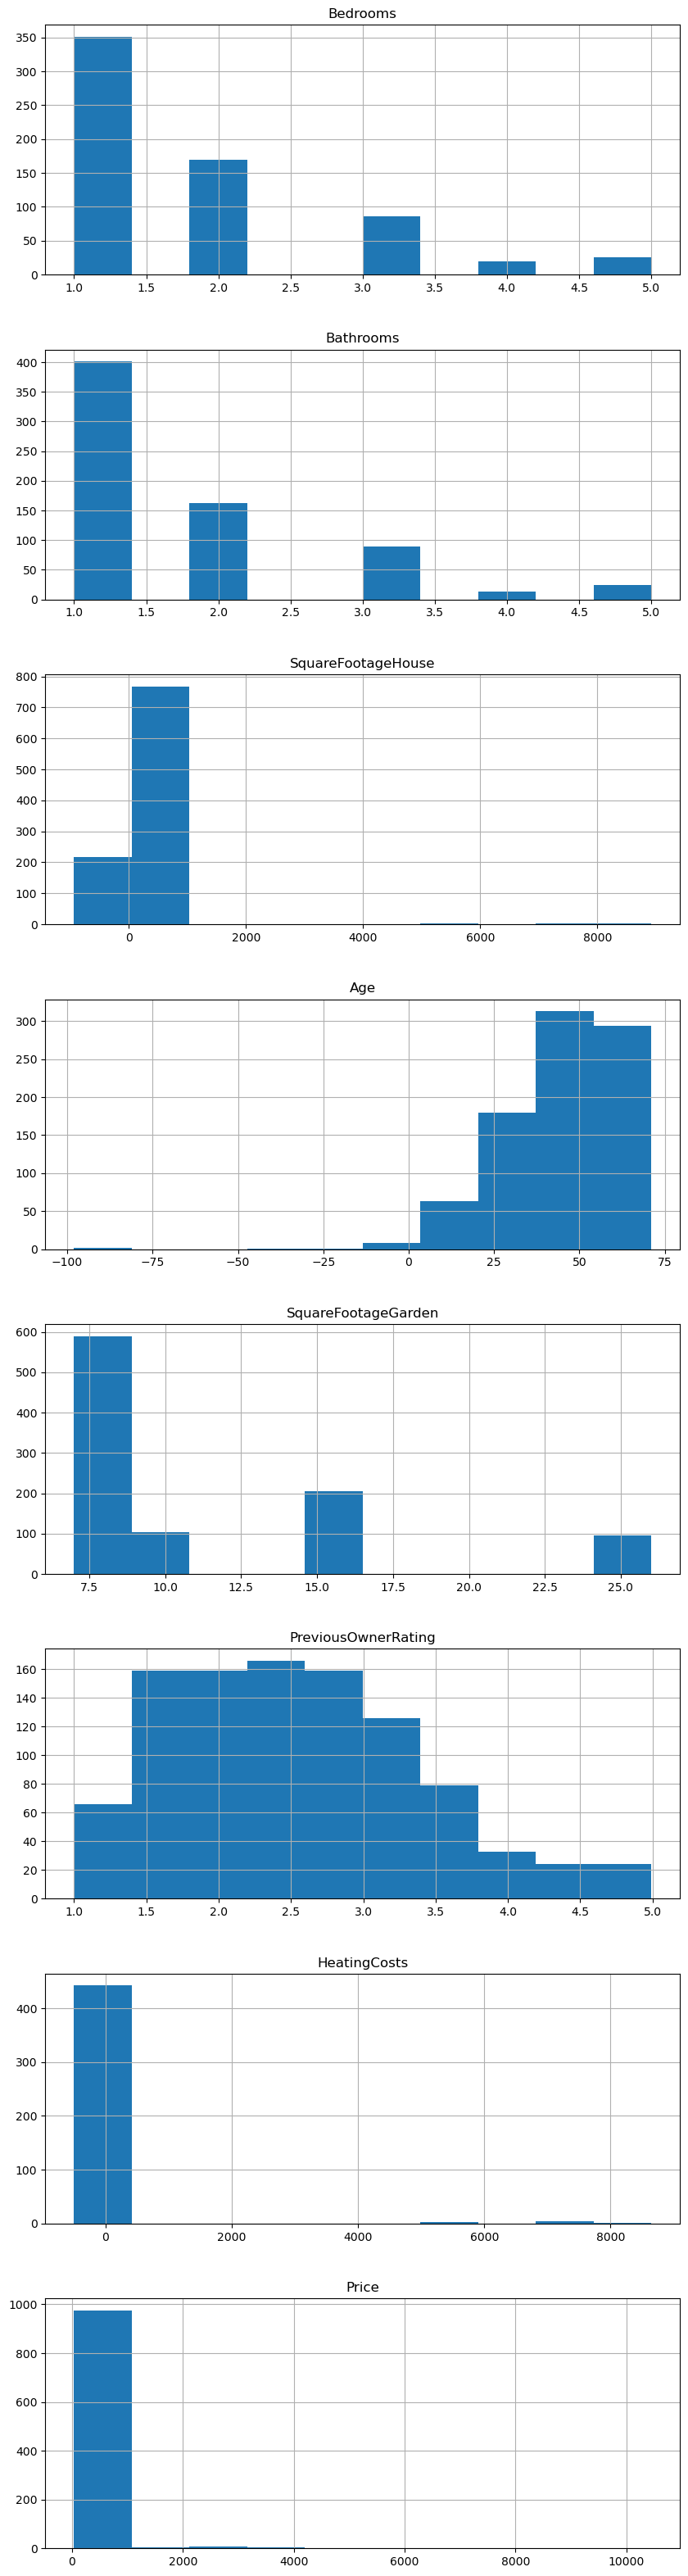

In [9]:
# Plotting subplots for histograms for each column
data.hist(bins=10, layout=(8, 1), figsize=(10, 40))
plt.show()

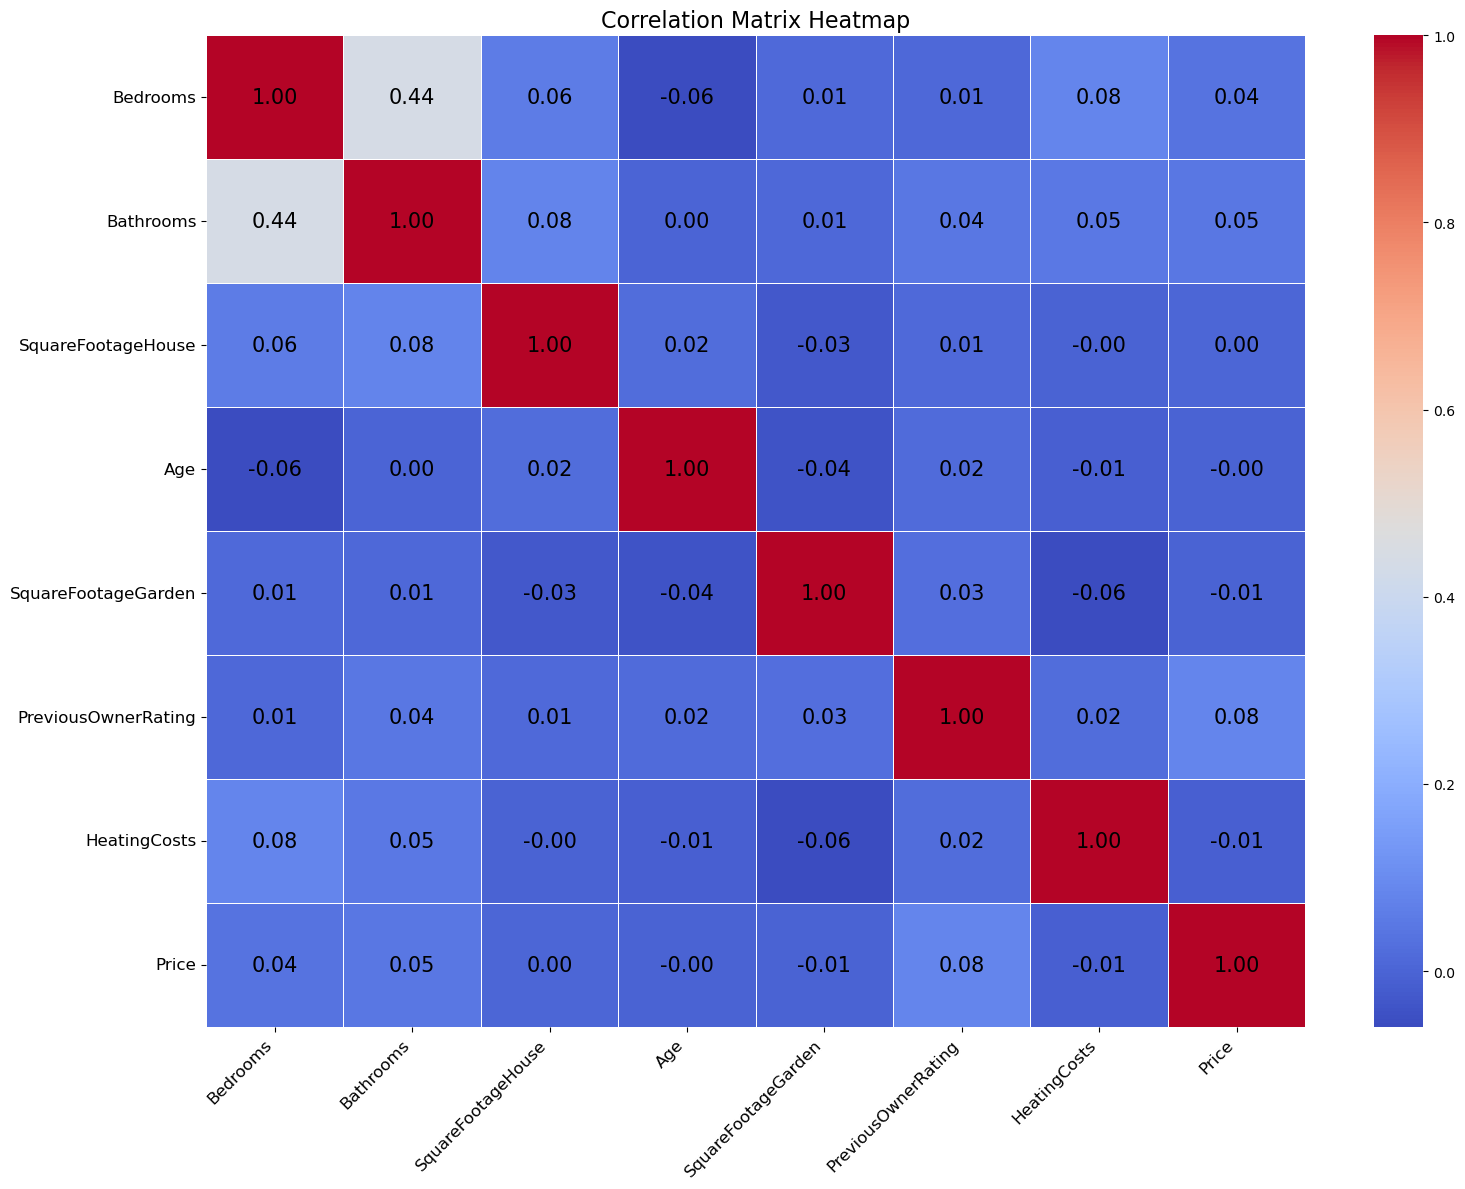

In [10]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add annotations manually
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        text = heatmap.axes.text(j+0.5, i+0.5, f'{correlation_matrix.iloc[i, j]:.2f}',
                                 ha='center', va='center', color='black', fontsize=15)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(np.arange(len(correlation_matrix.columns))+0.5, correlation_matrix.columns, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(correlation_matrix))+0.5, correlation_matrix.index, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


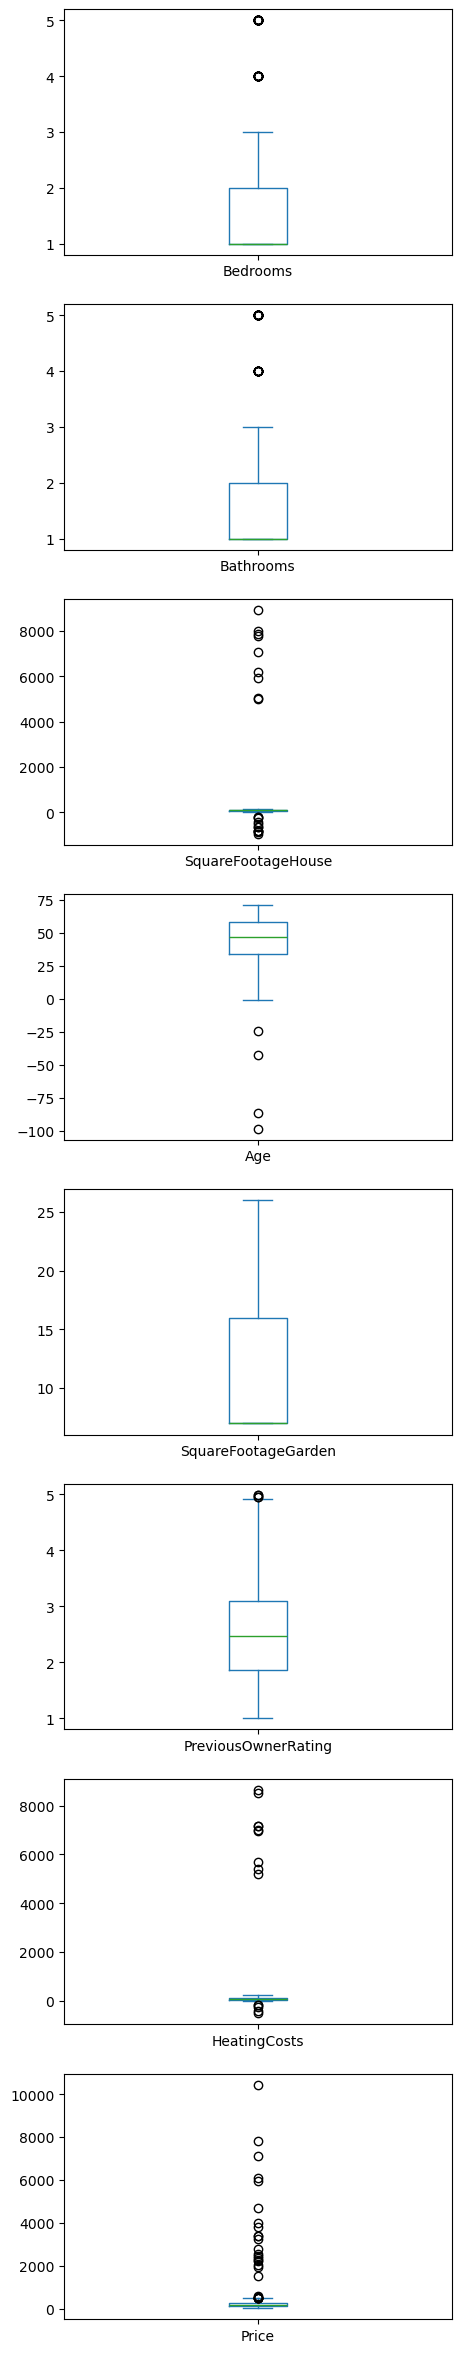

In [11]:
# Plotting subplots for each column
data.plot(kind='box', subplots=True, layout=(8, 1), figsize=(5, 30))
plt.show()

# Step 3: Data Preprocessing:

#### Handling the Data Negative Values

In [12]:
# Replace negative values with NaN
data['Age'] = np.where(data['Age'] < 0, np.nan, data['Age'])
data['SquareFootageHouse'] = np.where(data['SquareFootageHouse'] < 0, np.nan, data['SquareFootageHouse'])
data['HeatingCosts'] = np.where(data['HeatingCosts'] < 0, np.nan, data['HeatingCosts'])

In [13]:
#Drop unneeded columns
columns_to_drop = ['HasFireplace', 'PreviousOwnerName', 'WindowModelNames']
data.drop(columns=columns_to_drop, inplace=True)

In [14]:
# Convert DateSinceForSale to datetime format
data['DateSinceForSale'] = pd.to_datetime(data['DateSinceForSale'])
data['DaysSinceForSale'] = (pd.to_datetime('today') - data['DateSinceForSale']).dt.days
data.drop('DateSinceForSale', axis=1, inplace=True)

In [15]:
# Replace Nan Cells with None for PoolQuality
data['PoolQuality'].fillna("None", inplace=True)

#### Handling the Data Outliers

In [16]:
def replace_outliers_with_nan(data, column, threshold):
    data[column] = data[column].where(data[column] <= threshold, np.nan)
    return data

threshold_value = 1000.00

data = replace_outliers_with_nan (data, 'HeatingCosts', threshold_value)
data = replace_outliers_with_nan (data, 'SquareFootageHouse', threshold_value)
data = replace_outliers_with_nan (data, 'Price', threshold_value)


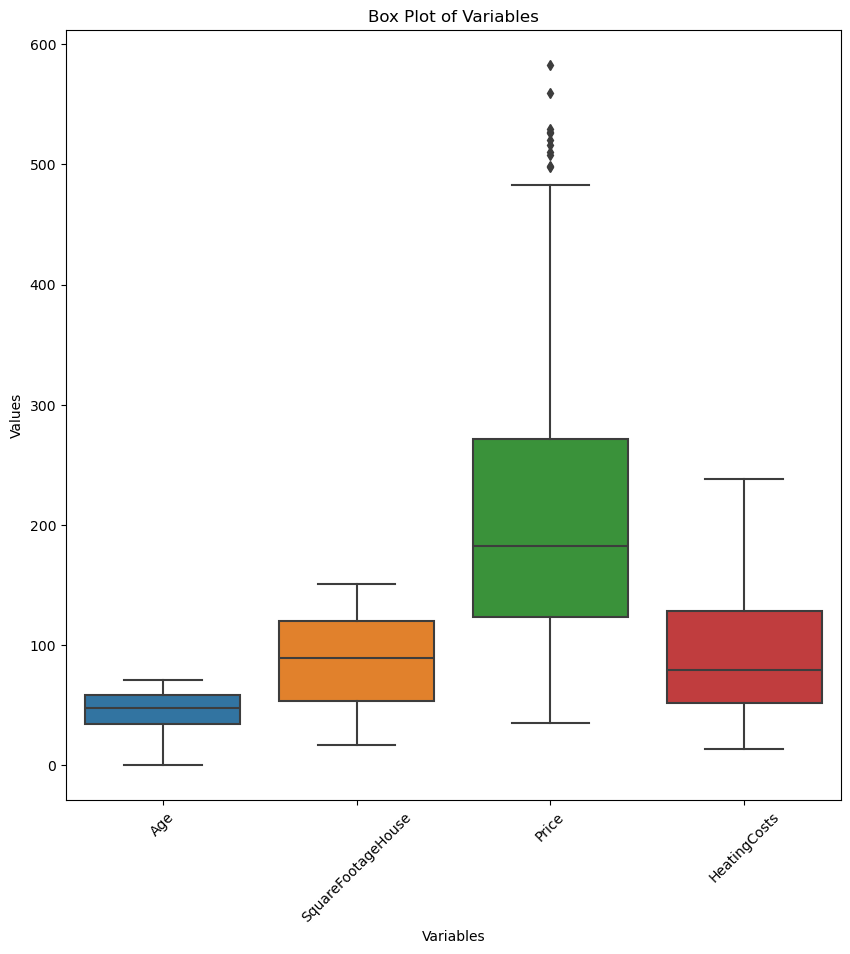

In [17]:
# Plotting box subplots for each column
def plot_multiple_boxplots(data, columns, title, xlabel, ylabel):
    # Melt the DataFrame to long format
    melted_data = data.melt(value_vars=columns, var_name='Variable', value_name='Value')

    # Create the boxplot
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='Variable', y='Value', data=melted_data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Define the columns to plot and other parameters
columns_to_plot = ['Age', 'SquareFootageHouse', 'Price', 'HeatingCosts']
plot_title = 'Box Plot of Variables'
x_axis_label = 'Variables'
y_axis_label = 'Values'


# Call the function
plot_multiple_boxplots(data, columns_to_plot, plot_title, x_axis_label, y_axis_label)

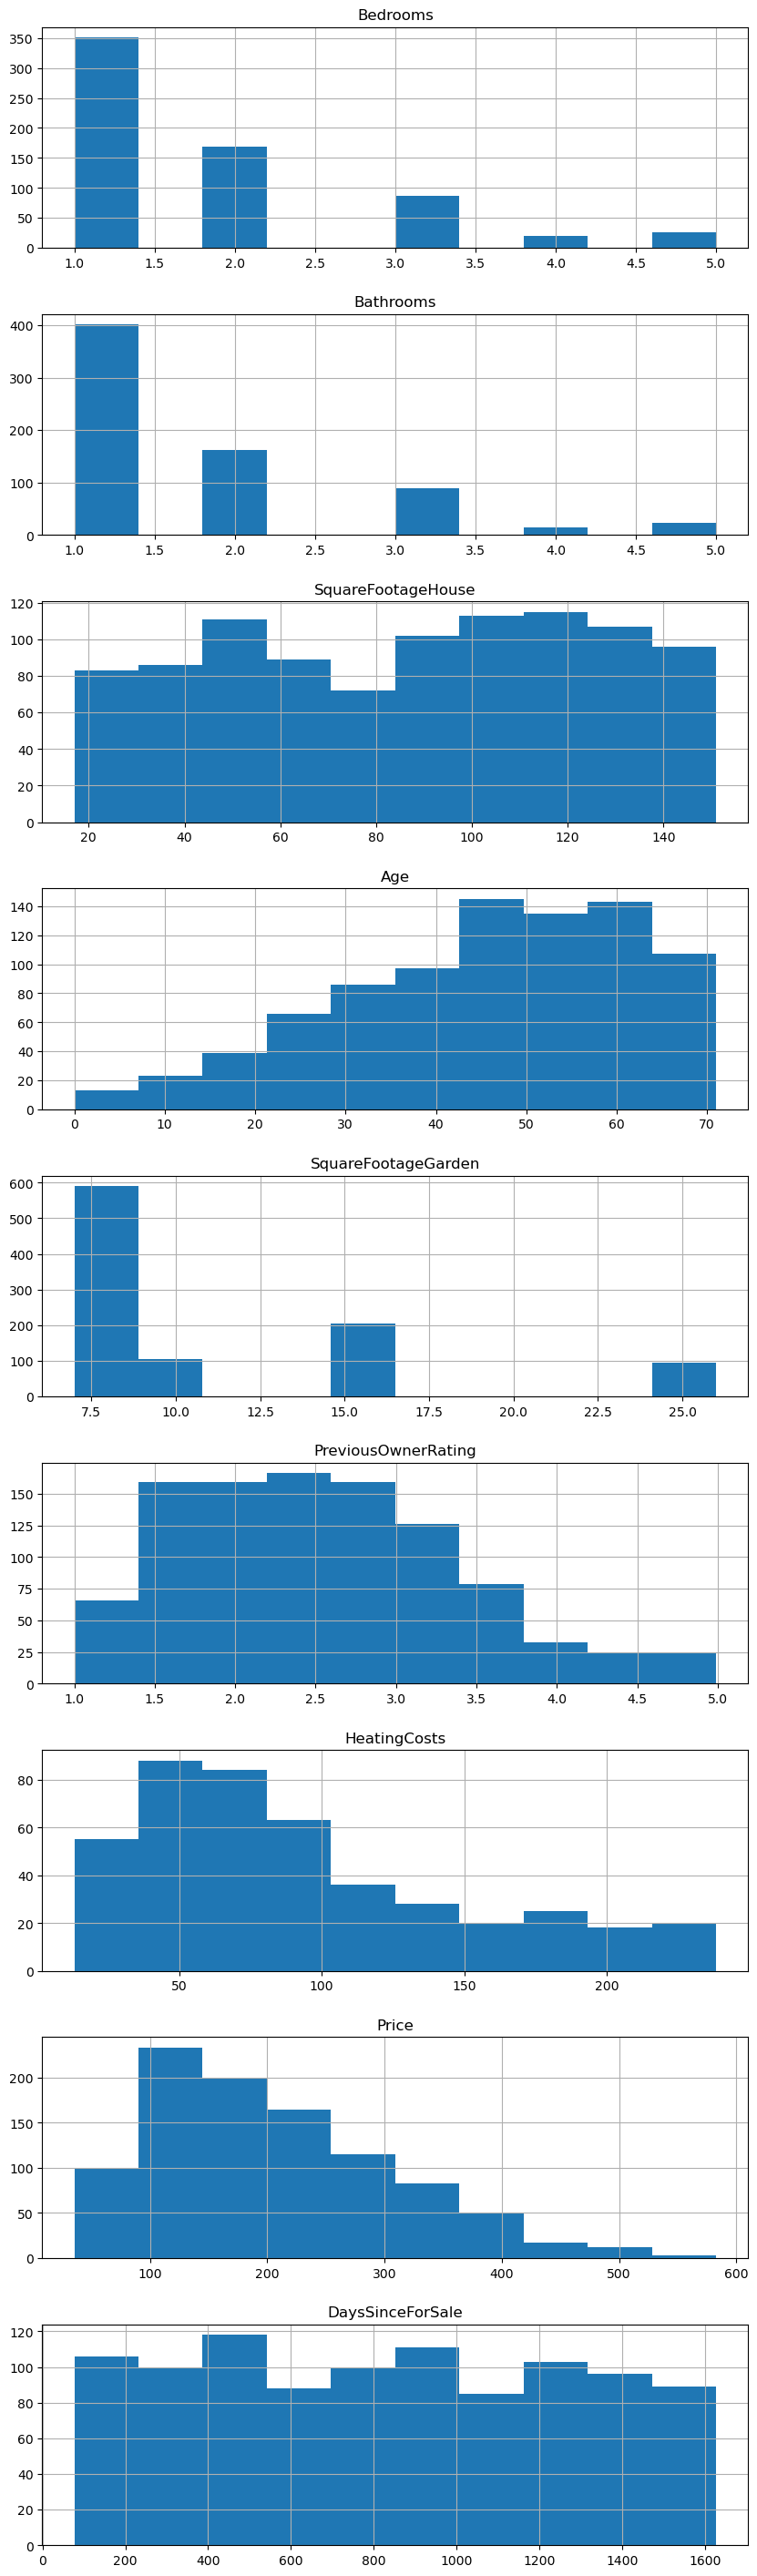

In [18]:
# Plotting subplots for histograms for each column
data.hist(bins=10, layout=(10, 1), figsize=(10, 40))
plt.show()

#### Replaces specified value in a given column

In [19]:
# Replaces specified value in a given column with a new value.
def replace_values(data, column_name, value, replacing_value):
    data[column_name] = data[column_name].replace(value, replacing_value)
    return data

data = replace_values(data, 'Location', 'Suburbann', 'Suburban')
data = replace_values(data, 'HeatingType', 'Oil Heating', 'Oil')
data = replace_values(data, 'HeatingType', 'Electric', 'Electricity')

#### Imputation Missing values using KNNImputer

In [20]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Replace missing categorical values with the most frequent value (mode)
for col in categorical_columns:
    data[col].fillna('None', inplace=True)
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

# Replace missing numerical values with KNN strategy
imputer = KNNImputer(n_neighbors=20)
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

#### Encoding Categorical Columns

In [21]:
# Define the mapping
proximity_mapping = {
    'None': 1,
    'Poor': 2,
    'Good': 3,
    'Excellent': 4,
}

# Define the columns to encode
columns_to_encode = [ 
    'KitchensQuality', 'BathroomsQuality', 'BedroomsQuality', 
    'LivingRoomsQuality', 'PoolQuality'
]

# Check and map each column
for column in columns_to_encode:
    new_column = f"{column}_encoded"    
    data[new_column] = data[column].map(proximity_mapping)  
    data.drop(column, axis=1, inplace=True)
    data[new_column] = data[new_column].astype(float)
    print(f"Column: {column}")
    print (data[new_column].unique())
    

Column: KitchensQuality
[4. 3. 2.]
Column: BathroomsQuality
[2. 3. 4.]
Column: BedroomsQuality
[3. 4. 2.]
Column: LivingRoomsQuality
[3. 2. 4.]
Column: PoolQuality
[2. 1. 3. 4.]


In [22]:
def one_hot_encode(data, columns_to_encode):
    data[columns_to_encode] = data[columns_to_encode].astype(str)
    
    # Initialize OneHotEncoder
    encoder = OneHotEncoder(drop='first', sparse=False)
    
    transformed = encoder.fit_transform(data[columns_to_encode])
    ohe_df = pd.DataFrame(transformed, columns=encoder.get_feature_names_out(columns_to_encode))
    ohe_df.index = data.index
    data = pd.concat([data, ohe_df], axis=1).drop(columns_to_encode, axis=1)
    return data

columns_to_one_hot_encode = ['HasPhotovoltaics','IsFurnished','HasFiberglass']

data = one_hot_encode(data, columns_to_one_hot_encode)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
def label_encode(data, columns_to_encode):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Apply label encoding to each column
    for column in columns_to_encode:
        data[column] = label_encoder.fit_transform(data[column])

    return data
    
columns_to_label_encode = ['HouseColor','Location','HeatingType']
data = label_encode(data, columns_to_label_encode)

In [24]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Bedrooms                    995 non-null    float64
 1   Bathrooms                   995 non-null    float64
 2   SquareFootageHouse          995 non-null    float64
 3   Location                    995 non-null    int64  
 4   Age                         995 non-null    float64
 5   HeatingType                 995 non-null    int64  
 6   HouseColor                  995 non-null    int64  
 7   SquareFootageGarden         995 non-null    float64
 8   PreviousOwnerRating         995 non-null    float64
 9   HeatingCosts                995 non-null    float64
 10  Price                       995 non-null    float64
 11  DaysSinceForSale            995 non-null    float64
 12  KitchensQuality_encoded     995 non-null    float64
 13  BathroomsQuality_encoded    995 non-null

In [25]:
# Check for missing values
data.isnull().sum()

Bedrooms                      0
Bathrooms                     0
SquareFootageHouse            0
Location                      0
Age                           0
HeatingType                   0
HouseColor                    0
SquareFootageGarden           0
PreviousOwnerRating           0
HeatingCosts                  0
Price                         0
DaysSinceForSale              0
KitchensQuality_encoded       0
BathroomsQuality_encoded      0
BedroomsQuality_encoded       0
LivingRoomsQuality_encoded    0
PoolQuality_encoded           0
HasPhotovoltaics_None         0
HasPhotovoltaics_True         0
IsFurnished_True              0
HasFiberglass_True            0
dtype: int64

In [26]:
data['Price'].describe()

count    995.000000
mean     205.417931
std      102.303963
min       35.354600
25%      124.655810
50%      182.465250
75%      270.291059
max      582.823100
Name: Price, dtype: float64

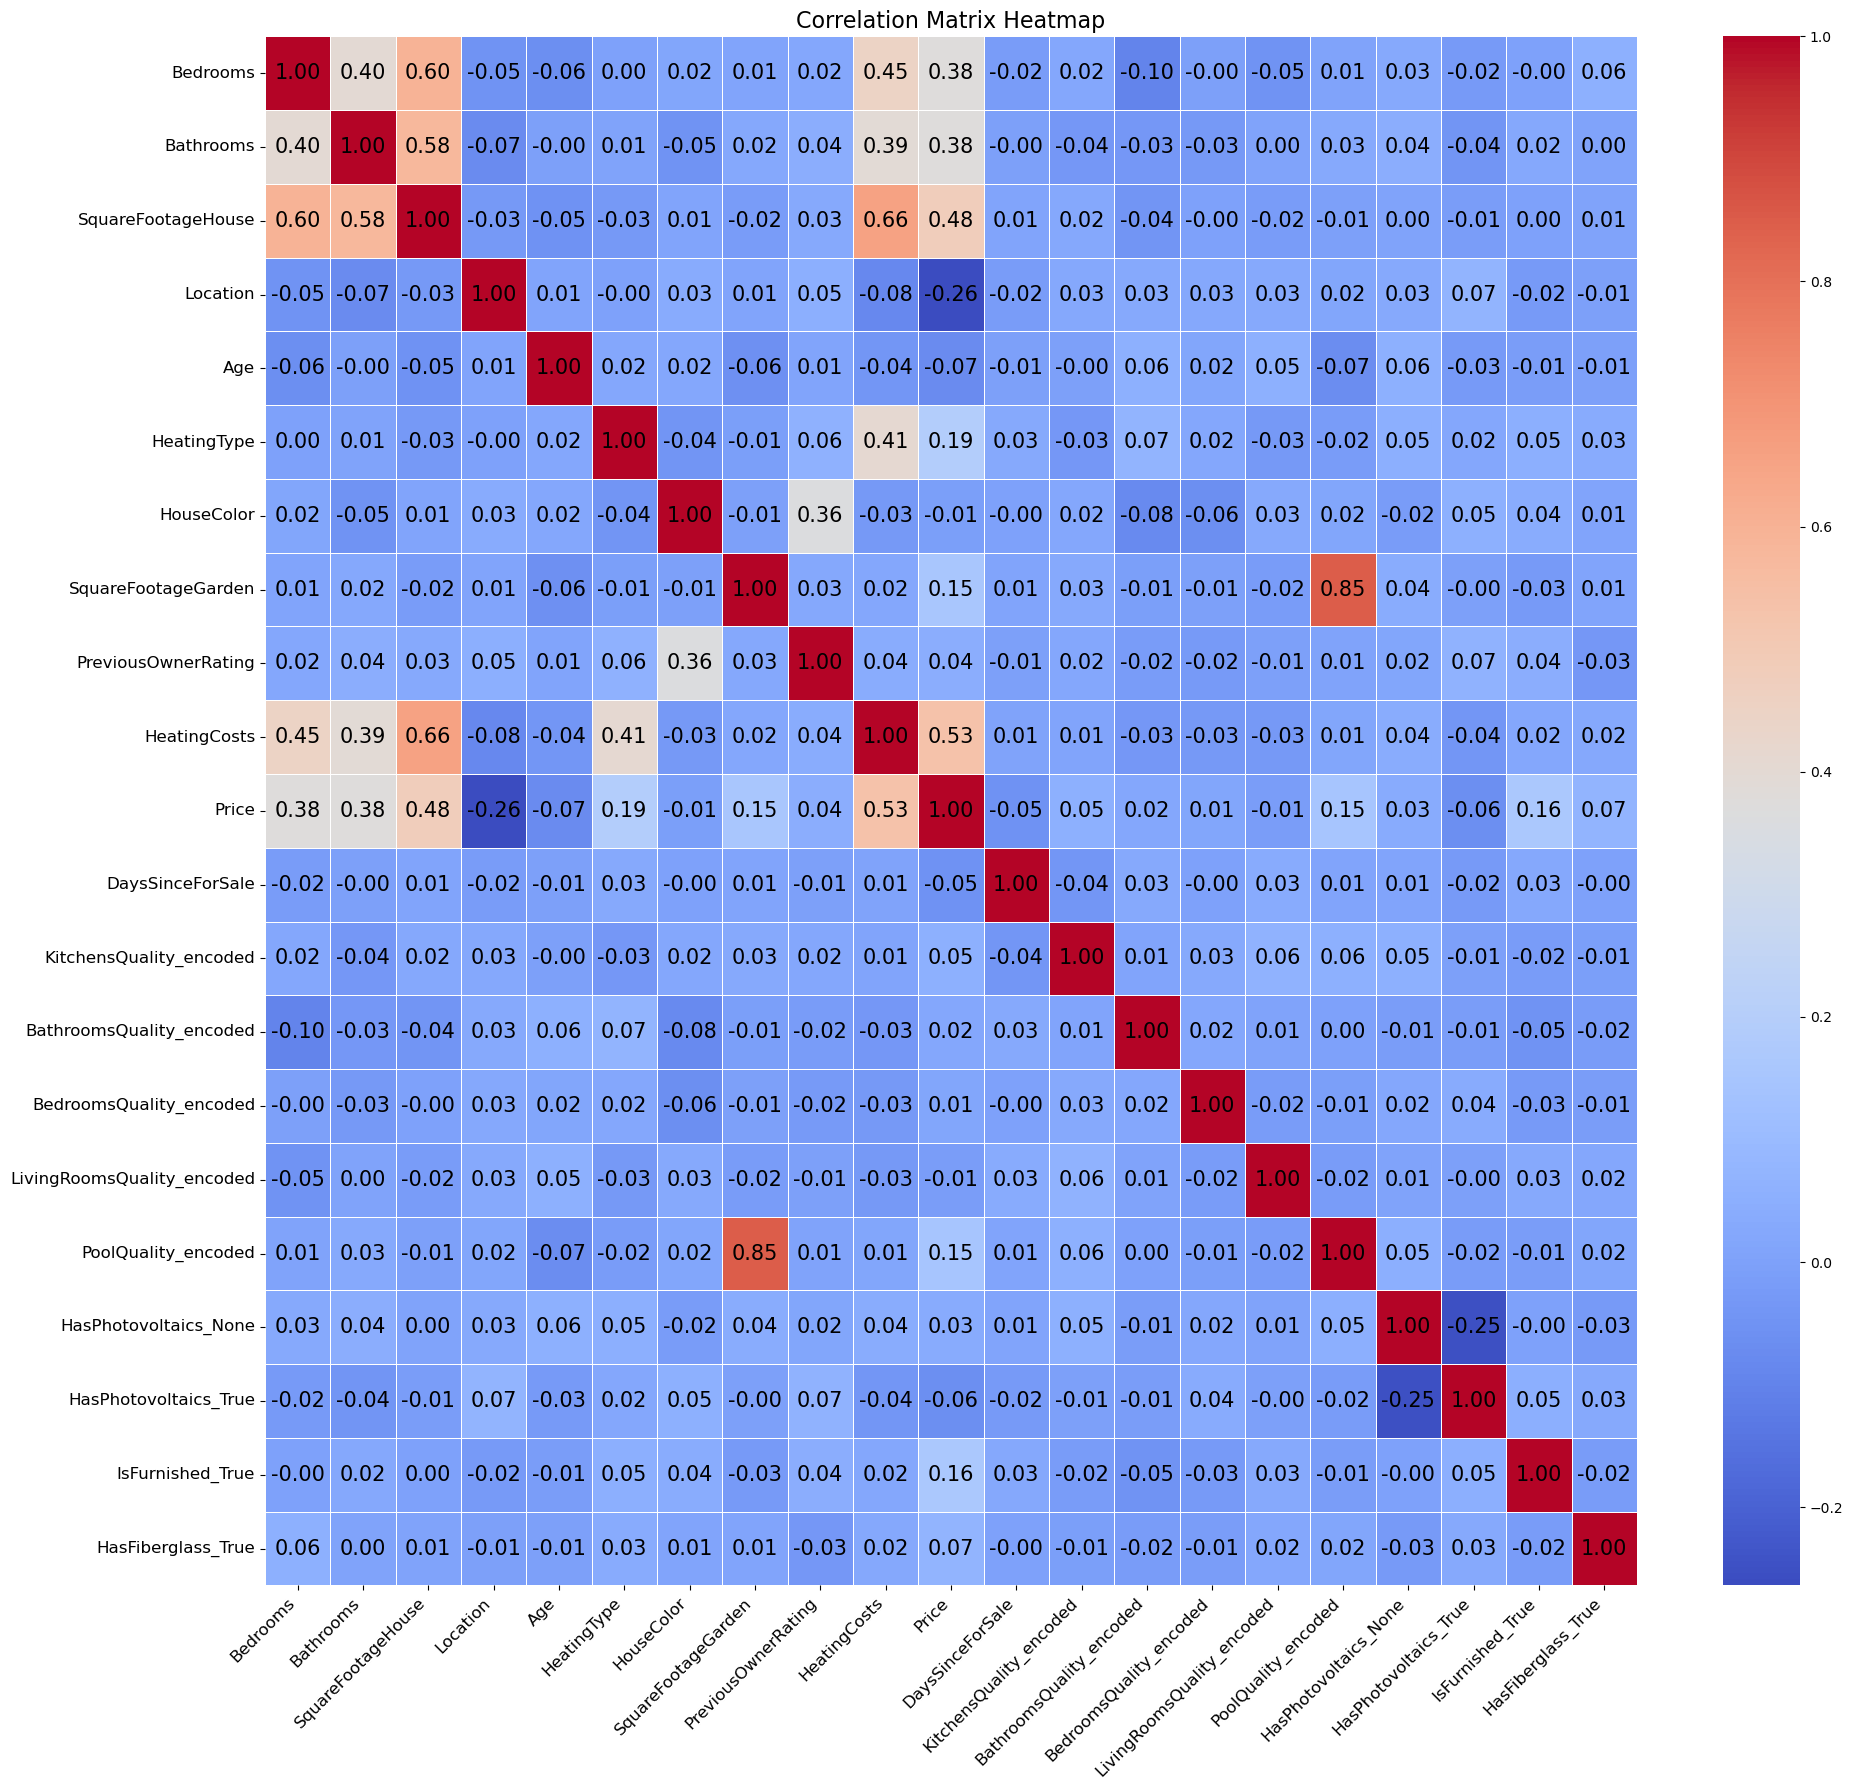

In [27]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Add annotations manually
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        text = heatmap.axes.text(j+0.5, i+0.5, f'{correlation_matrix.iloc[i, j]:.2f}',
                                 ha='center', va='center', color='black', fontsize=15)

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(np.arange(len(correlation_matrix.columns))+0.5, correlation_matrix.columns, rotation=45, ha='right', fontsize=12)
plt.yticks(np.arange(len(correlation_matrix))+0.5, correlation_matrix.index, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

In [28]:
data.to_csv("new_data.csv", index=False)

# Step 3: Model Selection and Training

#### Split the Data

In [29]:
X = data.drop('Price', axis=1)
y = data['Price']\

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Choose and Train Models

## 1. Linear Regression

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Model Evaluation
y_pred = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared Score:", r2_lr)

Linear Regression Evaluation:
Mean Absolute Error: 65.23758646369633
Mean Squared Error: 6236.28369316063
R-squared Score: 0.4806423768663888


## 2. Random Forest Regressor

In [31]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

#Model Evaluation
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Evaluation:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared Score:", r2_rf)

Random Forest Regression Evaluation:
Mean Absolute Error: 45.61223485753768
Mean Squared Error: 3419.146275439587
R-squared Score: 0.715253543595855


## 3. Gradient Boosting Regressor

In [32]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

#Model Evaluation
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression Evaluation:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R-squared Score:", r2_gb)

Gradient Boosting Regression Evaluation:
Mean Absolute Error: 44.11252138942786
Mean Squared Error: 3277.2157105539127
R-squared Score: 0.7270735191543556


In [33]:
# Convert the predictions to a pandas Series
predictions_series = pd.Series(y_pred_gb, name='Predicted Price')

# Get descriptive statistics
predictions_description = predictions_series.describe()

print("Descriptive Statistics of Predicted Prices:")
print(predictions_description)

Descriptive Statistics of Predicted Prices:
count    199.000000
mean     214.085197
std       86.981885
min       69.125106
25%      145.285622
50%      189.626256
75%      279.172201
max      419.246939
Name: Predicted Price, dtype: float64


# Based on these evaluation metrics,  "Gradient Boosting Regression" seem to perform better than Linear Regression and Random Forest Regression for predicting house prices in this dataset.

In [34]:
# Make predictions on the existing dataset
predictions_existing = gb_model.predict(X)

# Answering Specific Questions

# Question 1: If I have a budget of €100,000, what kind of houses will I be able to buy?
budget_existing = 100
affordable_houses_indices_existing = predictions_existing <= budget_existing
affordable_houses_existing = X[affordable_houses_indices_existing]

# Question 2: How much money can I save if I decide not to get a house with a pool?
predictions_no_pool_existing = predictions_existing[X['PoolQuality_encoded'] == 1]
predictions_pool_existing = predictions_existing[X['PoolQuality_encoded'] != 1]
savings_existing = (predictions_pool_existing.mean() - predictions_no_pool_existing.mean()) * 1000


print("Predictions on Existing Data:")
print("Number of affordable houses within €100,000 budget:", len(affordable_houses_existing))
print("Estimated savings by excluding houses with pools: €", savings_existing)

Predictions on Existing Data:
Number of affordable houses within €100,000 budget: 68
Estimated savings by excluding houses with pools: € 27263.969938790808


1. **Number of affordable houses within €100,000 budget:**
   - This indicates the number of houses in the existing dataset that are predicted to have prices within or below the specified budget of € 100,000.
   - In this case, the model predicts that there are 68 houses within or below the budget.
2. **Estimated savings by excluding houses with pools:**
   - This represents the estimated amount of money that can be saved by choosing not to purchase houses with pools.
   - The calculation is based on the difference between the mean predicted price of all houses and the mean predicted price of houses without pools.
   - In this case, the Average estimated savings amount to € 27,000.

# =========EXTRA ANALYSIS========

In [35]:
# Load the new data
new_data = pd.read_csv('new_data.csv', encoding='latin1')
new_data = new_data.drop('Price', axis=1)

# Use the trained model to make predictions
predictions_new_data = gb_model.predict(new_data)

# Convert the predictions to a pandas Series
predictions_series_new_data = pd.Series(predictions_new_data, name='Predicted Price')

# Combine the predictions with the new data
new_data_with_predictions = new_data.copy()
new_data_with_predictions['Predicted Price'] = predictions_series_new_data

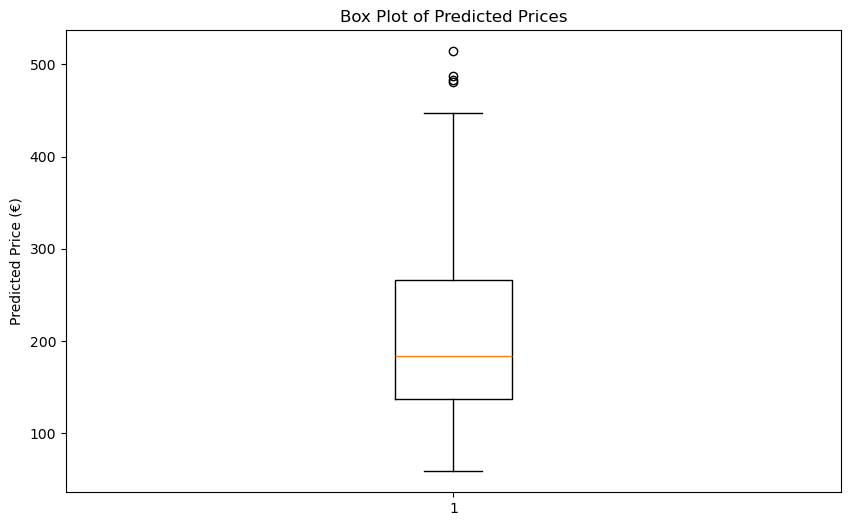

In [36]:
# Create a box plot for the 'Predicted Price' column
plt.figure(figsize=(10, 6))
plt.boxplot(new_data_with_predictions['Predicted Price'])
plt.title('Box Plot of Predicted Prices')
plt.ylabel('Predicted Price (€)')
plt.show()

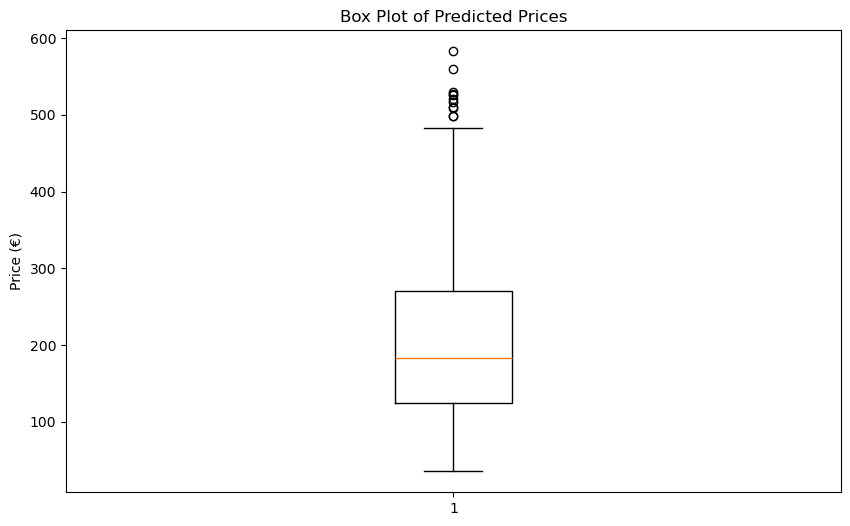

In [37]:
# Create a box plot for the 'Predicted Price' column
plt.figure(figsize=(10, 6))
plt.boxplot(data['Price'])
plt.title('Box Plot of Predicted Prices')
plt.ylabel('Price (€)')
plt.show()

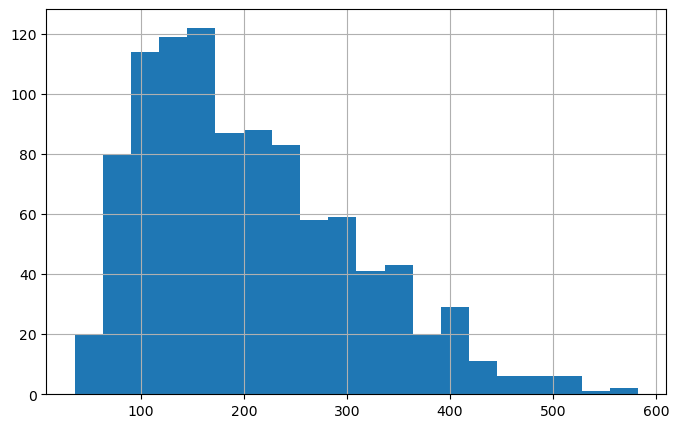

In [38]:
# Plotting subplots for histograms for each column
data['Price'].hist(bins=20, figsize=(8, 5))
plt.show()

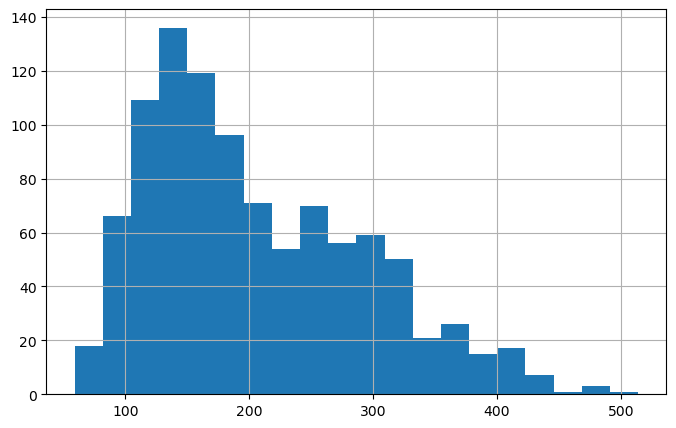

In [39]:
# Plotting subplots for histograms for each column
new_data_with_predictions['Predicted Price'].hist(bins=20, figsize=(8, 5))
plt.show()

In [40]:
new_data_with_predictions['Predicted Price'].describe()

count    995.000000
mean     205.443963
std       87.231609
min       59.037532
25%      137.586953
50%      184.272898
75%      265.728316
max      513.979958
Name: Predicted Price, dtype: float64

In [41]:
data['Price'].describe()

count    995.000000
mean     205.417931
std      102.303963
min       35.354600
25%      124.655810
50%      182.465250
75%      270.291059
max      582.823100
Name: Price, dtype: float64

In [42]:
new_data_with_predictions['Predicted Price'].sum()

204416.74330103718

In [43]:
data['Price'].sum()

204390.84144699998